# Linear Regression with PyTorch: Datasets, Models, and Losses 
Author: Pierre Nugues

## Dataset

We extract the counts of letters per chapter and the counts of _A_ from the *Salammbô* novel by Flaubert. There are 15 chapters in total.

In [1]:
import torch
from torch import nn
from torch import optim
import random
import matplotlib.pyplot as plt
import tqdm

In [2]:
random.seed(4321)
torch.manual_seed(4321)

In [3]:
X = torch.tensor(
    [[36961],
     [43621],
     [15694],
     [36231],
     [29945],
     [40588],
     [75255],
     [37709],
     [30899],
     [25486],
     [37497],
     [40398],
     [74105],
     [76725],
     [18317]]).float()

y = torch.tensor(
    [2503, 2992, 1042, 2487, 2014, 2805, 5062, 2643, 2126, 1784, 2641, 2766,
     5047, 5312, 1215]).reshape((-1, 1)).float()

## Visualizing the Dataset

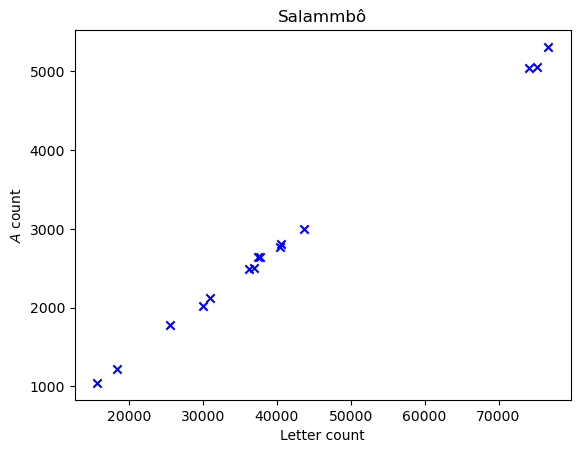

In [4]:
fr = plt.scatter(X, y, c='b', marker='x')
plt.title("Salammbô")
plt.xlabel("Letter count")
plt.ylabel("$A$ count")
plt.show()

## Linear Regression with PyTorch

We create the architecture. The model has an intercept (a bias) by default.

In [5]:
model = nn.Sequential(torch.nn.Linear(1, 1))

In [6]:
model[0].weight, model[0].bias

(Parameter containing:
 tensor([[-0.7489]], requires_grad=True),
 Parameter containing:
 tensor([0.0753], requires_grad=True))

We use the mean squared error and nadam, a variant of stochastic gradient descent, to find the parameters

In [7]:
loss_fn = nn.MSELoss()
optimizer = optim.NAdam(model.parameters(), lr=0.01)

## Batch descent

We fit the two parameters with the whole dataset

In [8]:
model.train()

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [9]:
loss_history = []
for epoch in range(250):
    sse = 0
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    sse += loss
    optimizer.zero_grad()
    loss.backward() # we compute the gradients
    optimizer.step() # we update the weights
    loss_history += [sse.detach().numpy()]

In [10]:
model[0].weight, model[0].bias 

(Parameter containing:
 tensor([[0.0676]], requires_grad=True),
 Parameter containing:
 tensor([0.8920], requires_grad=True))

### Visualising the Loss
We visualise the loss during the training process

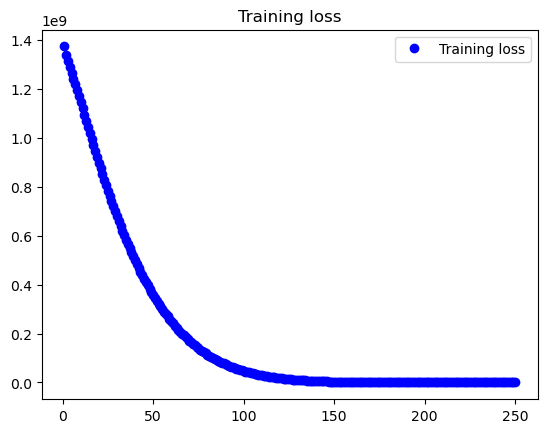

In [11]:
epochs = range(1, len(loss_history) + 1)
plt.plot(epochs, loss_history, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

## Stochastic descent
Each observation will lead to an update

We reset the model

In [12]:
model = nn.Sequential(torch.nn.Linear(1, 1))
loss_fn = nn.MSELoss()
optimizer = optim.NAdam(model.parameters(), lr=0.01)
model.train()

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [13]:
loss_history = []
for epoch in range(20):
    sse = 0
    for xi, yi in zip(X, y):
        yi_pred = model(xi)
        loss = loss_fn(yi_pred, yi)
        sse += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_history += [sse.detach().numpy()]

In [14]:
model[0].weight, model[0].bias 

(Parameter containing:
 tensor([[0.0686]], requires_grad=True),
 Parameter containing:
 tensor([-1.2003], requires_grad=True))

### Visualising the Loss
We visualise the loss during the training process

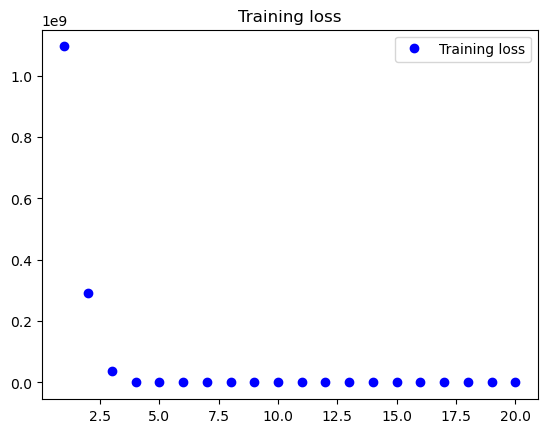

In [15]:
epochs = range(1, len(loss_history) + 1)
plt.plot(epochs, loss_history, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

## Mini-batch gradient descent

In [16]:
BATCH_SIZE = 4

In [17]:
model = nn.Sequential(torch.nn.Linear(1, 1))
loss_fn = nn.MSELoss()
optimizer = optim.NAdam(model.parameters(), lr=0.01)
model.train()

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [18]:
loss_history = []
for epoch in range(40):
    sse = 0
    for i in range(X.size()[0]//BATCH_SIZE):
        Xi = X[i:i+BATCH_SIZE]
        yi = y[i:i+BATCH_SIZE]
        yi_pred = model(Xi)
        loss = loss_fn(yi_pred, yi)
        sse += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_history += [sse.detach().numpy()]

In [19]:
model[0].weight, model[0].bias 

(Parameter containing:
 tensor([[0.0683]], requires_grad=True),
 Parameter containing:
 tensor([0.2967], requires_grad=True))

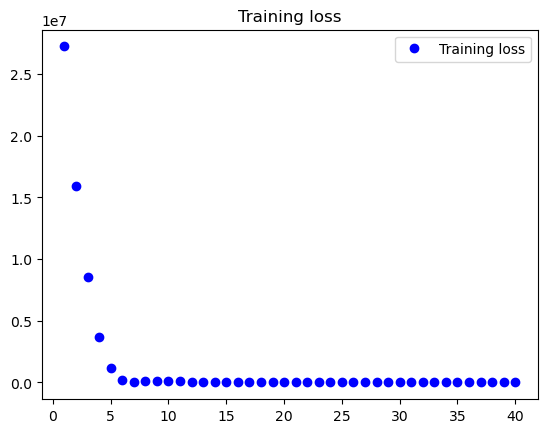

In [20]:
epochs = range(1, len(loss_history) + 1)
plt.plot(epochs, loss_history, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

## With a data loader

In [21]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [22]:
model = nn.Sequential(torch.nn.Linear(1, 1))
loss_fn = nn.MSELoss()
optimizer = optim.NAdam(model.parameters(), lr=0.01)
model.train()

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [23]:
loss_history = []
for epoch in range(100):
    sse = 0
    for X_batch, y_batch in dataloader:
        y_batch_pred = model(X_batch)
        loss = loss_fn(y_batch_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sse += loss
    loss_history += [sse.detach().numpy()]

In [24]:
model[0].weight, model[0].bias 

(Parameter containing:
 tensor([[0.0684]], requires_grad=True),
 Parameter containing:
 tensor([1.3799], requires_grad=True))

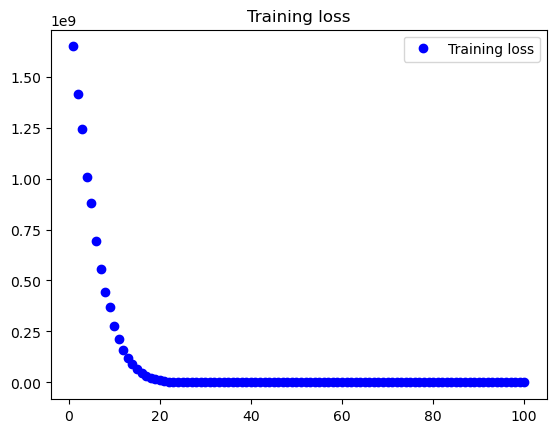

In [25]:
epochs = range(1, len(loss_history) + 1)
plt.plot(epochs, loss_history, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

## Visualizing the Final Model

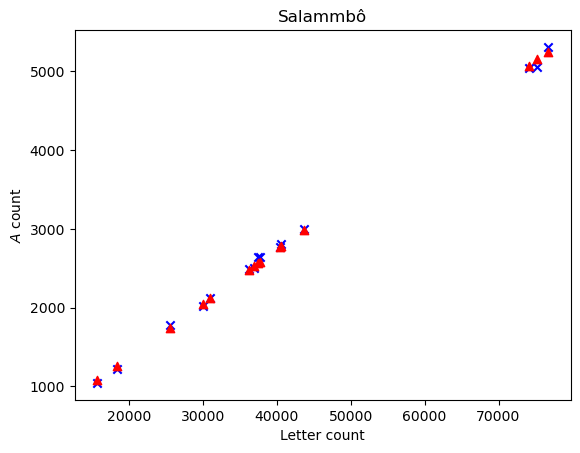

In [26]:
fr = plt.scatter(X, y, c='b', marker='x')
plt.scatter(X, model(X).detach().numpy(), color='red', marker='^')
plt.title("Salammbô")
plt.xlabel("Letter count")
plt.ylabel("$A$ count")
plt.show()


## PyTorch's Gradients
PyTorch computes automatically the gradients. See https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

We fit the model again

In [27]:
model = nn.Sequential(torch.nn.Linear(1, 1))
loss_fn = nn.MSELoss()
optimizer = optim.NAdam(model.parameters(), lr=0.01)
model.train()

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [28]:
loss_history = []
for epoch in range(250):
    sse = 0
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    sse += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history += [sse.detach().numpy()]

We apply it and we compute the loss

In [29]:
y_pred = model(X)
y_pred

tensor([[2499.3081],
        [2949.6240],
        [1061.3403],
        [2449.9492],
        [2024.9215],
        [2744.5479],
        [5088.5562],
        [2549.8843],
        [2089.4263],
        [1723.4263],
        [2535.5498],
        [2731.7009],
        [5010.7993],
        [5187.9502],
        [1238.6945]], grad_fn=<AddmmBackward0>)

In [30]:
loss = loss_fn(y_pred, y)
loss

tensor(3417.9285, grad_fn=<MseLossBackward0>)

we check the loss

In [31]:
1/X.size()[0] * (y_pred - y).T @ (y_pred - y)

tensor([[3417.9287]], grad_fn=<MmBackward0>)

We compute manually the gradients 
$$
\begin{array}{lclcl}
\displaystyle{\frac{\partial{Loss}}{\partial{m}}} &=& \displaystyle{\sum_{i = 1}^{q}{\frac{\partial{}}{\partial{m}}(y_i - (mx_i + b))^2}} &=& \displaystyle{-2\sum_{i = 1}^{q}{x_i(y_i - (mx_i + b))}} \\
\displaystyle{\frac{\partial{Loss}}{\partial{b}}} &=& \displaystyle{\sum_{i = 1}^{q}{\frac{\partial{}}{\partial{b}}(y_i - (mx_i + b))^2}} &=& \displaystyle{-2 \sum_{i = 1}^{q}{(y_i - (mx_i + b))}}
\end{array}
$$

In [32]:
-2/X.size()[0] * (y - y_pred).T @ X, -2/X.size()[0] * torch.sum((y - y_pred))

(tensor([[-3525749.2500]], grad_fn=<MmBackward0>),
 tensor(-73.7762, grad_fn=<MulBackward0>))

The gradients computed by PyTorch. The gradients are accumulated, we need to clear them and we backpropagate them to the weights

In [33]:
optimizer.zero_grad()
loss.backward()

In [34]:
model[0].weight.grad, model[0].bias.grad

(tensor([[-3525749.2500]]), tensor([-73.7762]))